In [147]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pickle

In [148]:
#reading dataset
data=pd.read_csv('diamond.csv')
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [149]:
#renaming the column name
data.rename( columns={'Unnamed: 0':'S.No'}, inplace=True )

In [150]:
data.head(10)

,S.No,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [151]:
#summary statistics
print(data.describe())

               S.No         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [152]:
print(data.dtypes)

S.No         int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [153]:
#finding unique values
a=data['cut'].unique()
b=data['color'].unique()
c=data['clarity'].unique()
print(a,b,c)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] ['E' 'I' 'J' 'H' 'F' 'G' 'D'] ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [154]:
#checking for missing values
print(data.isna().sum())

S.No       0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [155]:
print(data.isnull().sum())

S.No       0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [156]:
#user defined function to encode the values
dic={'Ideal':1,'Premium':2,'Good':3,'Very Good':4,'Fair':5}
def changecut(x):
    return int(dic[x])

In [157]:
data['cut']=data['cut'].apply(changecut)

In [158]:
dic1={'E':1, 'I':2, 'J':3, 'H':4, 'F':5, 'G':6,'D':7}
def changecolor(x):
    return dic1[x]

In [159]:
data['color']=data['color'].apply(changecolor)

In [160]:
dic2={'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}
def changeclarity(x):
    return dic2[x]

In [161]:
data['clarity']=data['clarity'].apply(changeclarity)

In [162]:
data.head(10)

,S.No,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,4,3,5,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,4,2,6,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,5,1,4,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,4,4,3,59.4,61.0,338,4.00,4.05,2.39


In [163]:
data.dtypes

S.No         int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [164]:
#Correlation matrix
cor=data.corr()
print(cor)

             S.No     carat       cut     color   clarity     depth     table  \
S.No     1.000000 -0.377983 -0.084898  0.014319  0.188391 -0.034800 -0.100830   
carat   -0.377983  1.000000  0.114426 -0.065386 -0.281218  0.028224  0.181618   
cut     -0.084898  0.114426  1.000000 -0.029128 -0.118670  0.169916  0.381988   
color    0.014319 -0.065386 -0.029128  1.000000  0.032589 -0.001665 -0.033998   
clarity  0.188391 -0.281218 -0.118670  0.032589  1.000000 -0.025877 -0.133692   
depth   -0.034800  0.028224  0.169916 -0.001665 -0.025877  1.000000 -0.295779   
table   -0.100830  0.181618  0.381988 -0.033998 -0.133692 -0.295779  1.000000   
price   -0.306873  0.921591  0.049421 -0.016560 -0.140270 -0.010647  0.127134   
x       -0.405440  0.975094  0.105361 -0.055268 -0.305918 -0.025289  0.195344   
y       -0.395843  0.951722  0.105319 -0.054762 -0.297037 -0.029341  0.183760   
z       -0.399208  0.953387  0.126726 -0.055684 -0.299969  0.094924  0.150929   

            price         x

<AxesSubplot:>

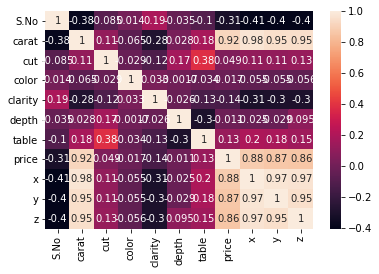

In [165]:
#heatmap
sns.heatmap(cor,annot=True)

In [166]:
data=data[['carat','cut','color','clarity','depth','table','price']]
data.head(10)

,carat,cut,color,clarity,depth,table,price
0,0.23,1,1,1,61.5,55.0,326
1,0.21,2,1,2,59.8,61.0,326
2,0.23,3,1,3,56.9,65.0,327
3,0.29,2,2,4,62.4,58.0,334
4,0.31,3,3,1,63.3,58.0,335
5,0.24,4,3,5,62.8,57.0,336
6,0.24,4,2,6,62.3,57.0,336
7,0.26,4,4,2,61.9,55.0,337
8,0.22,5,1,4,65.1,61.0,337
9,0.23,4,4,3,59.4,61.0,338


C:\Users\music\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

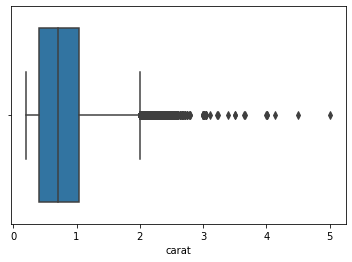

In [167]:
sns.boxplot(data['carat'])

In [168]:
data

,carat,cut,color,clarity,depth,table,price
0,0.23,1,1,1,61.5,55.0,326
1,0.21,2,1,2,59.8,61.0,326
2,0.23,3,1,3,56.9,65.0,327
3,0.29,2,2,4,62.4,58.0,334
4,0.31,3,3,1,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,1,7,2,60.8,57.0,2757
53936,0.72,3,7,2,63.1,55.0,2757
53937,0.70,4,7,2,62.8,60.0,2757
53938,0.86,2,4,1,61.0,58.0,2757


In [169]:
#choosing dependent and independent variables
y=data['price']
x=data[['carat','cut','color','clarity','depth','table']]

In [170]:
print(x)

       carat  cut  color  clarity  depth  table
0       0.23    1      1        1   61.5   55.0
1       0.21    2      1        2   59.8   61.0
2       0.23    3      1        3   56.9   65.0
3       0.29    2      2        4   62.4   58.0
4       0.31    3      3        1   63.3   58.0
...      ...  ...    ...      ...    ...    ...
53935   0.72    1      7        2   60.8   57.0
53936   0.72    3      7        2   63.1   55.0
53937   0.70    4      7        2   62.8   60.0
53938   0.86    2      4        1   61.0   58.0
53939   0.75    1      7        1   62.2   55.0

[53940 rows x 6 columns]


In [171]:
#training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [172]:
#Linear regression
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [173]:
print(reg.coef_)
print(reg.intercept_)
ypred=reg.predict(x_test)

[8156.56422176  -84.03142778   80.253829    279.48430648 -101.07562537
  -55.77075405]
5814.841791314571


In [174]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))
r2 = r2_score(y_test, ypred)
print('r2 score for perfect model is', r2)

Mean Absolute Error: 919.8176648146705
Mean Squared Error: 2075771.0956040034
Root Mean Squared Error: 1440.7536554192752
r2 score for perfect model is 0.869242994603824


In [175]:
#Decision Tree Regressor
decision = DecisionTreeRegressor(random_state=0)
decision.fit(x_train,y_train)
Ypred=decision.predict(x_test)

In [176]:
yp=[[2.3,2,6,7,60.2,59.0]]
print(decision.predict(yp))

[7508.]


In [177]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,Ypred)))
scor = r2_score(y_test, Ypred)
print('r2 score for perfect model is', scor)

Mean Absolute Error: 355.91489556297125
Mean Squared Error: 517614.83661129646
Root Mean Squared Error: 719.4545410318128
r2 score for perfect model is 0.9673943980975271


In [178]:
Pkl_Filename = "dpp.pkl"  
pickle.dump(decision, open(Pkl_Filename, 'wb'))

In [179]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

DecisionTreeRegressor(random_state=0)

In [180]:
score = Pickled_LR_Model.score(x_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(x_test)  

Ypredict

Test score: 96.74 %


array([ 827., 2026.,  666., ...,  912., 2321.,  756.])